# Initial Value Problems
## September 29th, 2022
### Overview: Using scipy's solve_ivp to solve initial value ODEs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
%matplotlib inline

## Problem 1
Write a function which implements Euler's method. Test your function on the IVP:
$$\begin{align}
	\begin{split}
		x' (t)&= x(t) - 2t + 4,\quad 0 \leq t \leq 2, \\
		x(0) &= 0,
	\end{split}
\end{align}$$

where the analytic solution is $x(t) = -2+2t + 2e^t$.

Use the Euler method to numerically approximate the solution with step sizes $h = 0.2, 0.1$, and $0.05.$  Plot the true solution alongside the three approximations.

In [3]:
def euler(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the Euler method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    #calc h
    h = t[1]-t[0]
    
    #initialize x solution
    x = np.zeros( (len(t), len(x0))  )
    x[0] = x0
    
    #euler
    for i in range(len(t)-1):
        x[i+1] = x[i] + h*f(x[i],t[i])
        
    return x

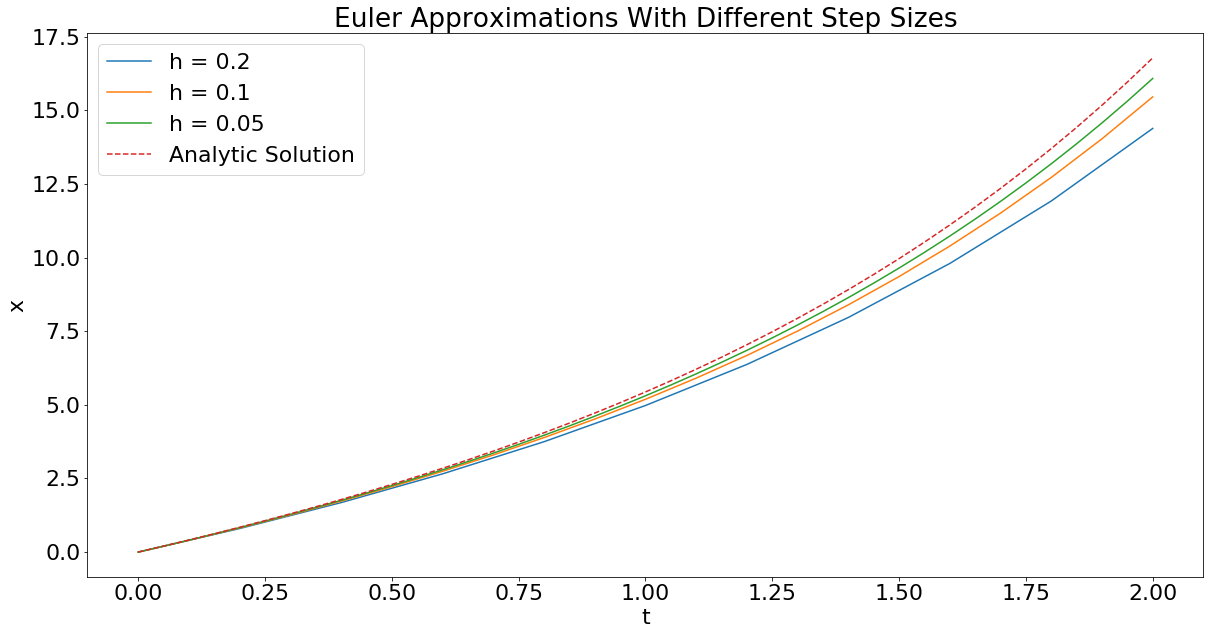

In [4]:
#derivative func, analytic sol
f = lambda x,t: x - 2*t + 4
X = lambda t: -2 + 2*t + 2*np.exp(t)

#init cond
x0 = [0]

#all step sizes
hs = [0.2,0.1,0.05]

plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (20,10) #make plots big

#calc for each h and plot
for h in hs:
    t = np.arange(0,2+h,h)
    x = euler(f,x0,t)
    
    plt.plot(t,x,label='h = '+str(h))
    
#plot analytic, titles
plt.plot(t,X(t),'--',label='Analytic Solution')
plt.title('Euler Approximations With Different Step Sizes')
plt.ylabel('x')
plt.xlabel('t')
plt.legend()
plt.show()

## Problem 2

Write functions that implement the midpoint and fourth-order Runge-Kutta methods. Then, consider again the IVP from Problem 1. Use the Euler, Midpoint, and RK4 methods to approximate the value of the solution for step sizes of $h = 0.2,$ $ 0.1,$ $0.05 $, $0.025,$ and $0.0125.$ Plot the true solution alongside the approximation obtained from each method when $h=0.2$. Then, use `plt.loglog` to create a log-log plot of the relative error $|x(2)-x_n|/{|x(2)|}$ as a function of $h$ for each approximation.

In [5]:
def midpoint(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using the midpoint method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    #calc h
    h = t[1]-t[0]
    
    #initialize x
    x = np.zeros(( len(t), len(x0)  ))
    x[0] = x0 
    
    #iterate, use midpoint method
    for i in range(len(t)-1):
        x_hat = x[i] + (h/2)*f(x[i],t[i])
        f_hat = f(x_hat,t[i] + (h/2))
        x[i+1] = x[i] + h*f_hat
        
    return x

def rk4(f,x0,t):
    """Numerically approximates the solution to the IVP:
    
    x'(t) = f(x(t),t)
    x(t0) = x0
    
    using a fourth-order Runge-Kutta method.
    Parameters:
        f (function): The right-hand side of the ODE
        x0 ((m,) ndarray): The initial condition
        t ((n,) ndarray): The array of time values
    Returns:
        ((n,m) ndarray): The approximate solution, where x[i] ≈ x(t_i)
    """
    #calc h
    h = t[1]-t[0]
    
    #initialize x
    x = np.zeros((len(t),len(x0)))
    x[0] = x0
    
    #iterate, use 4th order RK
    for i in range(len(t)-1):
        #K coeffs
        K1 = f(x[i], t[i])
        K2 = f(x[i] + 0.5*h*K1, t[i] + 0.5*h)
        K3 = f(x[i] + 0.5*h*K2, t[i] + 0.5*h)
        K4 = f(x[i] + h*K3, t[i+1])
        
        x[i+1] = x[i] + h*(1/6)*(K1 + 2*K2 + 2*K3 + K4)
        
    return x

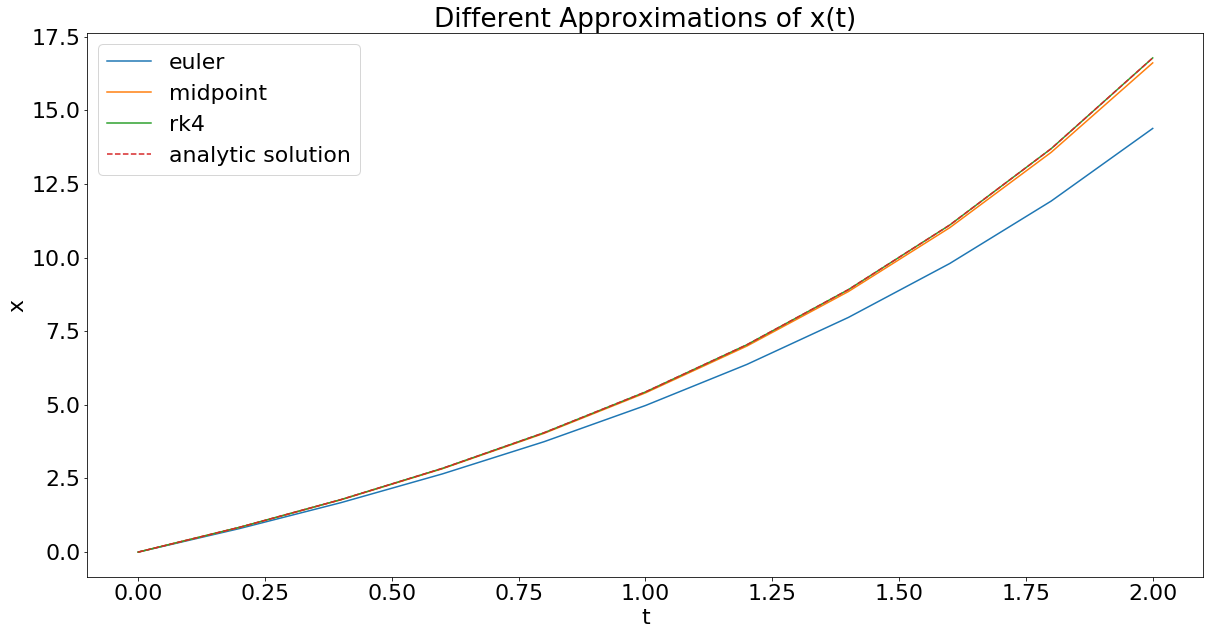

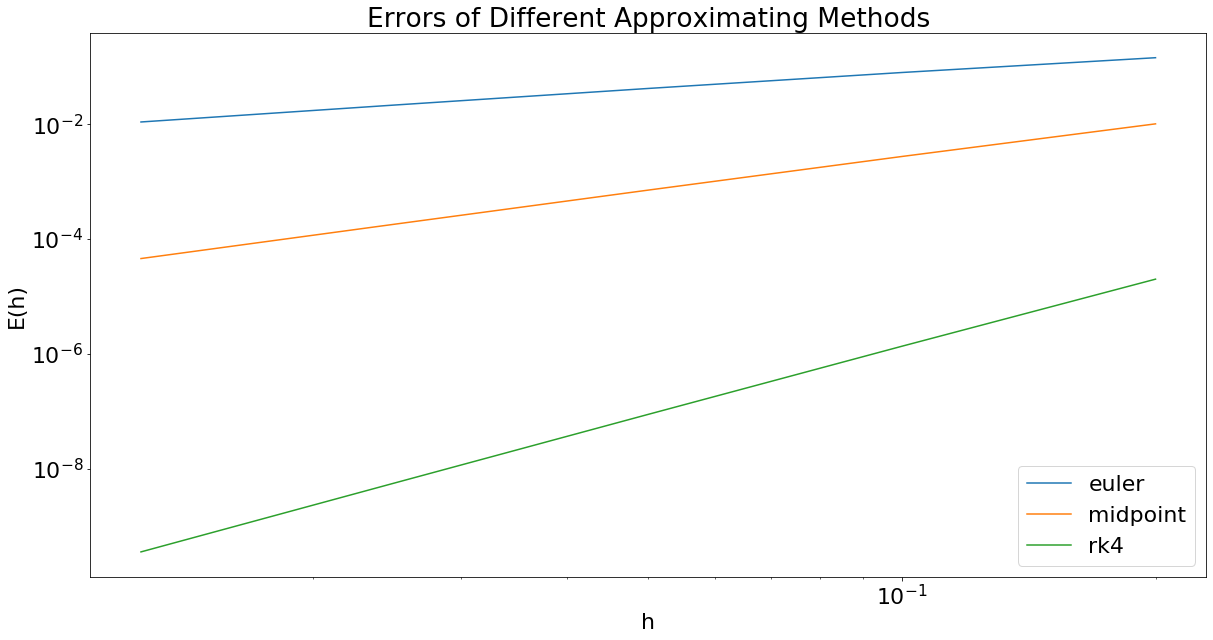

In [6]:
f = lambda x,t: x - 2*t + 4

#calculate
h = 0.2
x0 = [0]
t = np.arange(0,2+h,h)
x_e = euler(f,x0,t)
x_m = midpoint(f,x0,t)
x_r = rk4(f,x0,t)

#plot
plt.plot(t,x_e,label='euler')
plt.plot(t,x_m,label='midpoint')
plt.plot(t,x_r,label='rk4')
plt.plot(t,X(t),'--',label='analytic solution')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Different Approximations of x(t)')
plt.legend()
plt.show()

#NOW DOING ERRORS
hs = [0.2,0.1,0.05,0.025,0.0125]

#get initial errors
x_e_errs = abs(x_e[-1] - X(2))/(X(2))
x_m_errs = abs(x_m[-1] - X(2))/(X(2))
x_r_errs = abs(x_r[-1] - X(2))/(X(2))

#for each h, get new approximation of x(t) from each method
for h in hs[1:]:
    t = np.arange(0,2+h,h)
    x_e = euler(f,x0,t)
    x_m = midpoint(f,x0,t)
    x_r = rk4(f,x0,t)
    
    #calc errors
    e_err = abs(x_e[-1] - X(2))/(X(2))
    m_err = abs(x_m[-1] - X(2))/(X(2))
    r_err = abs(x_r[-1] - X(2))/(X(2))
    
    #append errors
    x_e_errs = np.concatenate((x_e_errs, e_err))
    x_m_errs = np.concatenate((x_m_errs, m_err))
    x_r_errs = np.concatenate((x_r_errs, r_err))

#plot
plt.loglog(hs,x_e_errs,label='euler')
plt.loglog(hs,x_m_errs,label='midpoint')
plt.loglog(hs,x_r_errs,label='rk4')
plt.xlabel('h')
plt.ylabel('E(h)')
plt.title('Errors of Different Approximating Methods')
plt.legend()
plt.show()

## Problem 3

Use the RK4 method to solve for the simple harmonic oscillator satisfying:
$$\begin{align}
	\begin{split}
&{}my'' + ky = 0,\quad 0 \leq t \leq 20, \\
&{}y(0) = 2, \quad
y'(0) = -1,
	\end{split}
\end{align}$$

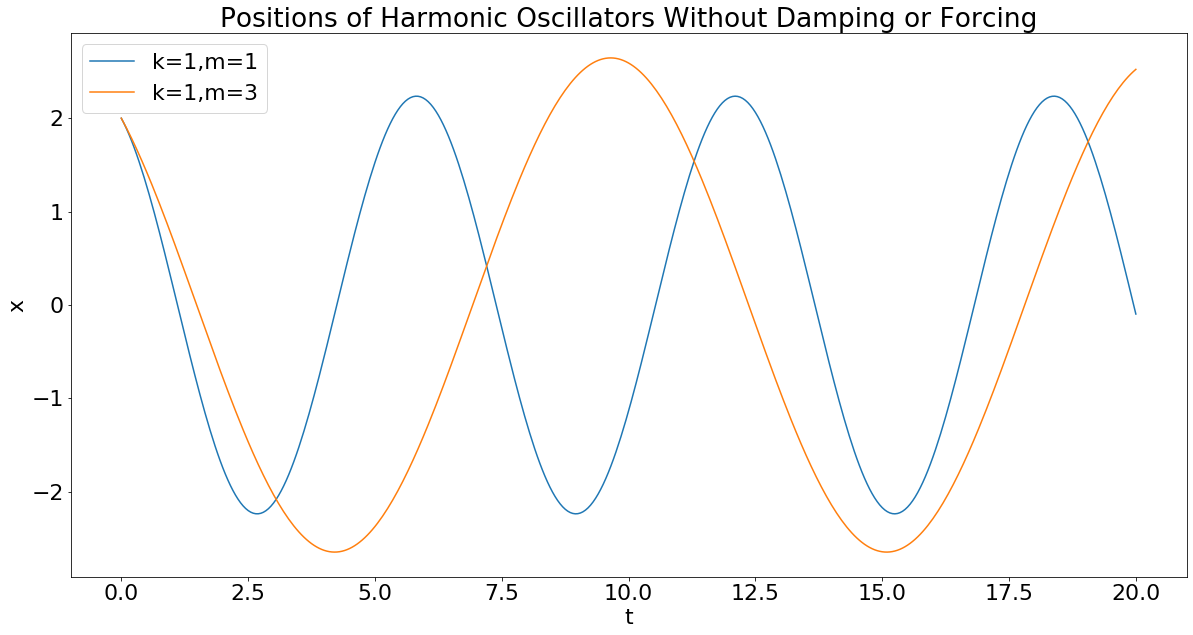

In [7]:
#DEFINE DERIVATIVE FUNCs: x = [y, y'] =>  x' = [y', -(k/m)y] 
f1 = lambda x,t: np.array( [x[1], -x[0]] )         #k=1, m=1
f2 = lambda x,t: np.array( [x[1], -(1/3)*x[0]] )   #k=1, m=3

#init cond
x0 = [2,-1]

#time interval
t = np.arange(0,20+0.05,0.05)
#solve using rk4
x1 = rk4(f1,x0,t)
x2 = rk4(f2,x0,t)

#plot
plt.plot(t,x1[:,0],label='k=1,m=1')
plt.plot(t,x2[:,0],label='k=1,m=3')
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Positions of Harmonic Oscillators Without Damping or Forcing')
plt.show()

## Problem 4

Use the RK4 method to solve for the damped free harmonic oscillator satisfying 
$$\begin{align*}
&{}y'' +\gamma y'+ y = 0, \quad 0 \leq t \leq 20,\\
&{}y(0) = 1, \quad
y'(0) = -1.
\end{align*}$$
For $\gamma = 1/2,$ and $\gamma = 1$, simultaneously plot your numerical approximations of $y$.

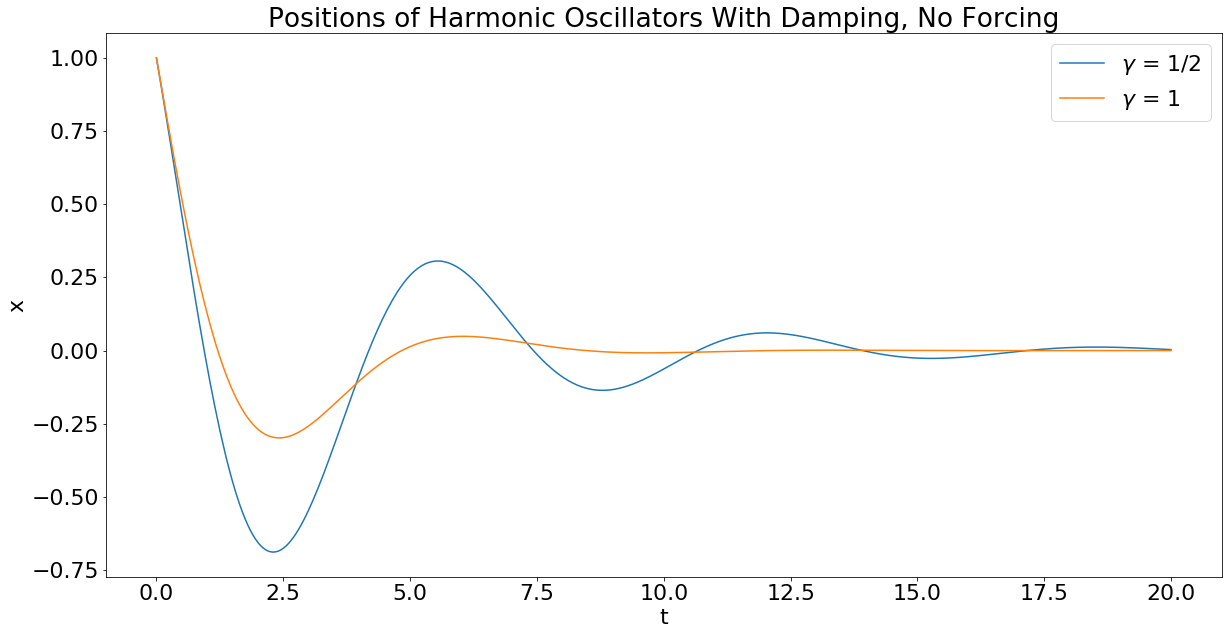

In [8]:
#x = [y,y'] => x'= [y',(-ky-𝛾y')/m] and k=m=1
f1 = lambda x,t: np.array([ x[1], -x[0]-0.5*x[1]  ])  #gamma = 1/2
f2 = lambda x,t: np.array([ x[1], -x[0]-x[1]  ])      #gamma = 1

#init cond
x0 = [1,-1]
#time interval
t = np.arange(0,20+0.05,0.05)

#solve each
x1 = rk4(f1,x0,t)
x2 = rk4(f2,x0,t)

#plot
plt.plot(t,x1[:,0],label=r'$\gamma$ = 1/2')
plt.plot(t,x2[:,0],label=r'$\gamma$ = 1')
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.title('Positions of Harmonic Oscillators With Damping, No Forcing')
plt.show()

## Problem 5

Use the RK4 method to solve for the damped and forced harmonic oscillator satisfying 
\begin{align}
	\begin{split}
&{}2y'' + \gamma y' + 2y = 2 \cos (\omega t), \quad 0 \leq t \leq 40,\\
&{}y(0) = 2, \quad
y'(0) = -1. 
	\end{split}
	\label{ivp:damped_forced_oscillator}
\end{align}
For the following values of $\gamma$ and $\omega,$ plot your numerical approximations of $y(t)$: $(\gamma, \omega) = (0.5, 1.5),$ $(0.1, 1.1),$ and $(0, 1)$.

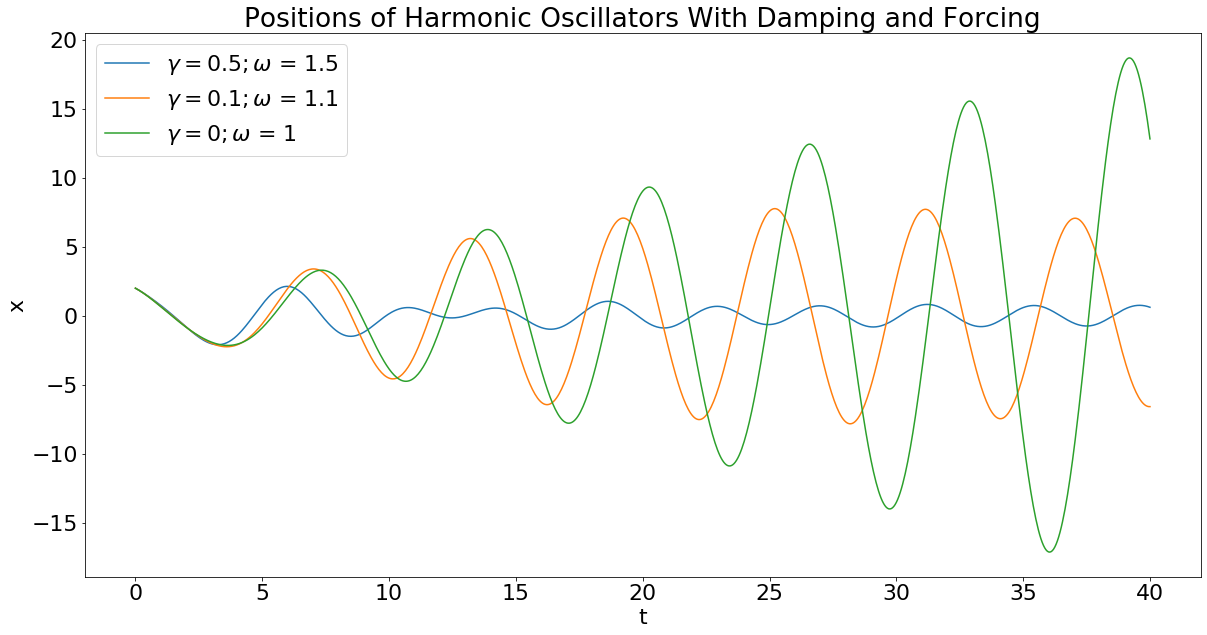

In [9]:
#forcing function
F = lambda w,t: 2*np.cos(w*t)

# x = [y,y'] => x' = [y', (F-2y-𝛾y')/2]
f1 = lambda x,t: np.array([ x[1], (F(1.5,t)-2*x[0]-0.5*x[1])/2    ]) #gamma = 0.5, omega = 1.5
f2 = lambda x,t: np.array([ x[1], (F(1.1,t)-2*x[0]-0.1*x[1])/2    ]) #gamma = 0.1,  omega = 1.1
f3 = lambda x,t: np.array([ x[1], (F(1,t)-2*x[0])/2    ]) #gamma = 0,  omega = 1

#init cond
x0 = [2,-1]
#time interval
t = np.arange(0,40+0.05,0.05)

#solve each with rk4
x1 = rk4(f1,x0,t)
x2 = rk4(f2,x0,t)
x3 = rk4(f3,x0,t)

#plot
plt.plot(t,x1[:,0],label=r'$\gamma = 0.5; \omega$ = 1.5')
plt.plot(t,x2[:,0],label=r'$\gamma = 0.1; \omega$ = 1.1')
plt.plot(t,x3[:,0],label=r'$\gamma = 0; \omega$ = 1')
plt.title('Positions of Harmonic Oscillators With Damping and Forcing')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()